In [1]:
import warnings
warnings.filterwarnings('ignore')
from autoencoders import *
from pdb_utils import *
import pickle
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [50]:
import seaborn as sns; sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt

In [2]:
with open('label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f)

In [3]:
with open('ProteinContactMapDict.pkl', 'rb') as f:
    proteinmatrixdict = pickle.load(f)

In [14]:
print "NUMBER OF PROTEINS: {}".format(len(proteinmatrixdict.keys()))
print "PROTEINS VECTOR SIZE: {}".format(len(proteinmatrixdict.values()[0]))

NUMBER OF PROTEINS: 2765
PROTEINS VECTOR SIZE: 2016


In [58]:
X_train, y_train = [],[]

for protein,vector in proteinmatrixdict.items():
    X_train.append(vector)
    y_train.append(label_dict[protein])
protein_names = proteinmatrixdict.keys()

In [36]:
print "NUMBER OF FAMILIES: {}".format(len(set(y_train)))

NUMBER OF FAMILIES: 200


In [37]:
input_size = len(X_train[0])
new_features, loss = LinearAutoencoder(X_train, input_size, 50, 100, learning_rate=0.0001)

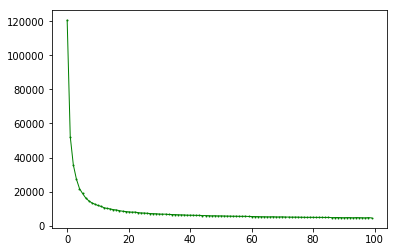

In [40]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

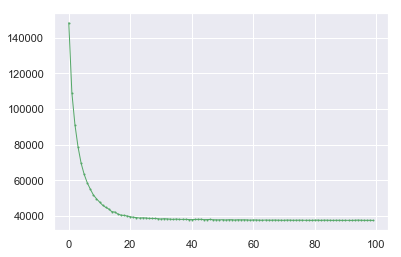

In [57]:
input_size = len(X_train[0])
new_features, loss = LinearAutoencoder(X_train, input_size, 50, 100, learning_rate=0.0001)
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [46]:
iris = sns.load_dataset("iris")
species = iris.pop("species")

In [61]:
df = pd.DataFrame(new_features, index =y_train)

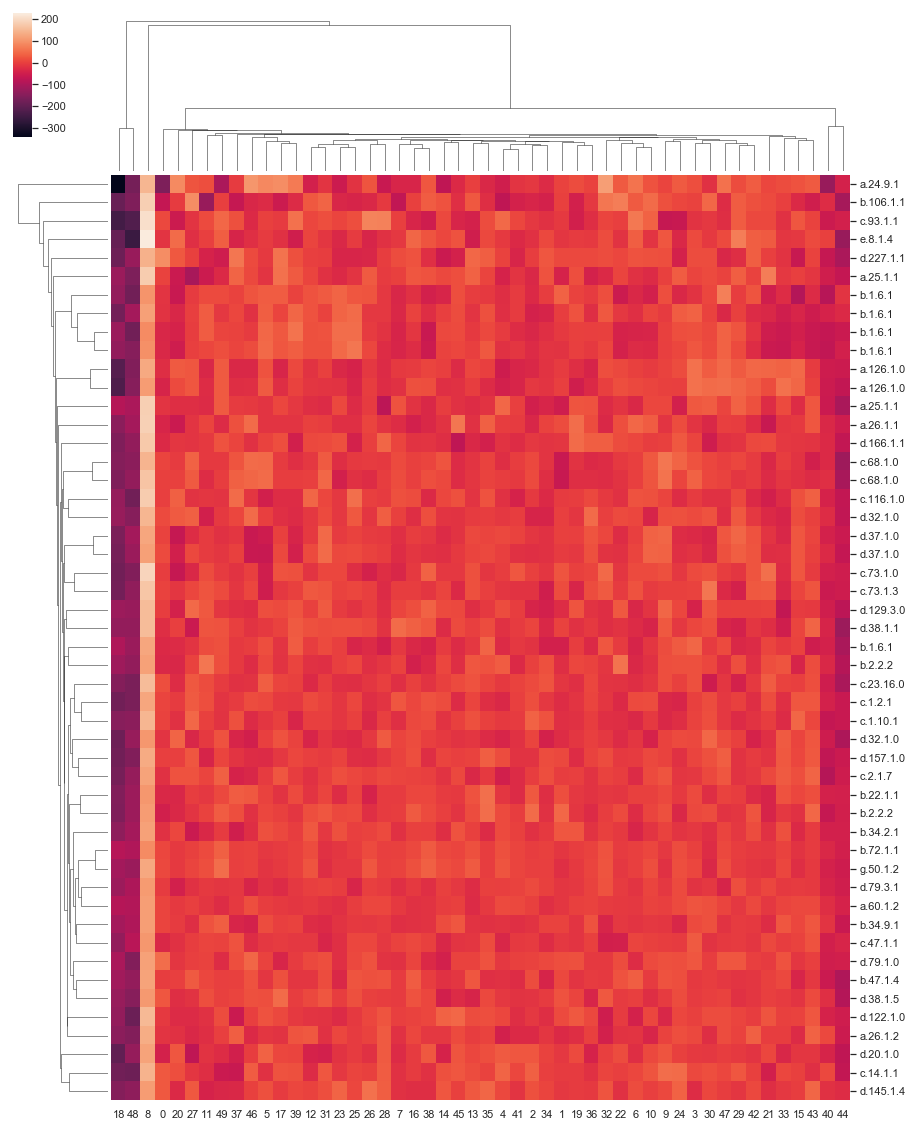

In [65]:
g = sns.clustermap(df[:50], yticklabels=True, figsize=(15, 20))

In [66]:
g.savefig("fig.png")